# 1. PCA

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format','{:20.2f}'.format)

plt.style.use('seaborn')

In [2]:
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

cols_arange = [col for col in hitters if col !=hitters.columns[-2]] + [hitters.columns[-2]]
hitters = hitters[cols_arange]

In [3]:
# load data
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

cols_arange = [col for col in hitters if col !=hitters.columns[-2]] + [hitters.columns[-2]]
hitters = hitters[cols_arange]

hitters['League']= pd.get_dummies(hitters['League']).iloc[:,1]
hitters['Division']=pd.get_dummies(hitters['Division']).iloc[:,1]
hitters['NewLeague']=pd.get_dummies(hitters['NewLeague']).iloc[:,1]

X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [5]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [6]:
pca = PCA()
X_pca = pca.fit_transform(scale(X))
pd.DataFrame(X_pca)

,0,1,2,3,4,5,...,13,14,15,16,17,18
0,-0.01,1.87,1.27,-0.94,1.11,1.21,...,0.39,0.06,0.14,0.08,0.04,-0.02
1,0.41,-2.43,-0.91,-0.26,1.23,1.83,...,-0.02,0.07,0.16,0.04,0.01,-0.00
2,3.47,0.83,0.56,-1.62,-0.86,-1.03,...,-0.38,0.23,0.01,-0.22,0.04,-0.07
3,-2.56,-0.23,0.52,-2.18,-0.82,1.49,...,0.03,0.04,0.05,-0.04,0.01,-0.01
4,1.03,-1.57,1.33,3.49,0.98,0.51,...,-0.09,0.04,0.01,-0.05,0.13,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,-0.33,-0.17,0.78,-1.54,-1.04,-0.31,...,-0.16,0.23,-0.22,0.13,-0.06,-0.01
259,3.25,-0.54,1.21,2.75,-1.20,0.83,...,0.32,-0.14,0.01,-0.15,-0.05,-0.06
260,-1.09,-0.75,-0.94,1.07,0.71,-0.64,...,0.09,0.06,-0.10,-0.08,0.07,0.01
261,1.98,-2.18,-0.28,-0.22,-0.69,3.51,...,-0.23,0.02,-0.26,-0.01,0.02,-0.01


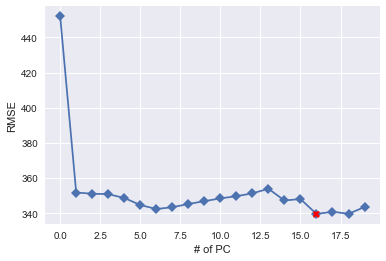

In [9]:
# 10-fold CV, with shuffle

n=len(X_pca)
k10 = KFold(n, n_splits=10, shuffle = True, random_state=42)

lin_reg = LinearRegression()
rmse = []

# Intercept만 있는 경우 MSE
score = -1 * cross_val_score(lin_reg, np.ones((n,1)), y, cv=k10, scoring='neg_mean_squared_error').mean()
#scoring 방법이 neg가 붙기 때문에 앞에 1을 곱해주어야 한다.

rmse.append(np.sqrt(score))

# Principal Component를 하나씩 추가할 때마다 RMSE가 어떻게 변하는지.
for i in np.arange(1, 20):
    score = -1 * cross_val_score(lin_reg, X_pca[:, :i], y, cv=k10, scoring='neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))

min_rmse = np.array(rmse).argmin()

plt.plot(rmse, '-D')
plt.plot(rmse, markevery=[min_rmse], marker='X', lw=0, color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE');

In [10]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 38.31423957,  60.15531541,  70.8416746 ,  79.03419435,
        84.29027516,  88.63477938,  92.26288766,  94.96304322,
        96.28269124,  97.25541298,  97.97775424,  98.64870031,
        99.15178693,  99.4730334 ,  99.74659124,  99.89398793,
        99.96815949,  99.99375108, 100.        ])

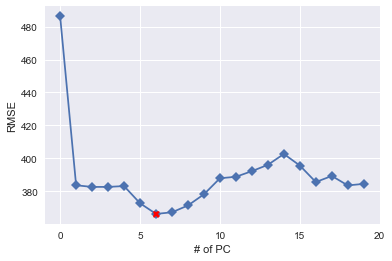

In [11]:
# validation set approach

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

pca2 = PCA()
X_train_pca2 = pca2.fit_transform(scale(X_train))
# X_train 변수를 pc 변환 해줌.

n = len(X_train_pca2)
k10_2 = KFold(n, n_splits=10, shuffle = True, random_state=1)

lin_reg2 = LinearRegression()
rmse2 = []

# intercept만 있는 경우
score = -1 * cross_val_score(lin_reg2, np.ones((n,1)), y_train, cv=k10_2, scoring='neg_mean_squared_error').mean()
rmse2.append(np.sqrt(score))

# MSE for the 19 prinipal components
for i in np.arange(1, 20):
    score = -1 * cross_val_score(lin_reg2, X_train_pca2[:, :i], y_train, cv=k10_2, scoring='neg_mean_squared_error').mean()
    rmse2.append(np.sqrt(score))

min_rmse = np.array(rmse2).argmin()

plt.plot(rmse2, '-D')
plt.plot(rmse2, markevery=[min_rmse], marker='X', lw=0, color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE')
plt.xticks([0,5,10,15,20]);

In [18]:
min_rmse

6

In [19]:
# 6개의 principal component를 가지고 regression 돌려서 test set과 MSE를 구해보자.

X_train_pca3 = pca2.fit_transform(scale(X_train))[:,:7] #:7로 해야 6개까지 됨.
X_test_pca3 = pca2.fit_transform(scale(X_test))[:, :7]

lin_reg3 = LinearRegression().fit(X_train_pca3, y_train)
pred_pca3 = lin_reg3.predict(X_test_pca3)

mean_squared_error(y_test, pred_pca3)

114098.05632066303

# 2. Partial Least Squares

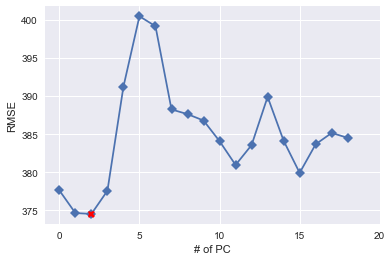

In [24]:
# 10-fold CV, with shuffle

n = len(X_train)
k10 = KFold(n, n_splits=10, shuffle=True, random_state=1)

rmse=[]

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = -1 * cross_val_score(pls, scale(X_train), y_train, cv=k10, scoring='neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))
    
min_rmse = np.array(rmse).argmin()

plt.plot(rmse, '-D')
plt.plot(rmse, markevery=[min_rmse], marker='X', lw=0, color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE')
plt.xticks([0,5,10,15,20]);

In [25]:
min_rmse

2

In [26]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

104838.51042760804